## 細線化処理

In [6]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

def thining(img):
    H, W, C = img.shape
    
    nn4 = [[0,1,0], [1,0,1], [0,1,0]]
    nn8 = [[1,1,1],[1,0,1], [1,1,1]]
    
    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[...,0]>1] = 1  
    
    count = 1
    while count > 0:
        count = 0
        tmp = out.copy()  
        
        # each pixel (rasta scan)
        for y in range(H):
            for x in range(W):
                if tmp[y,x] == 0:
                    continue
                # count satisfied conditions
                judge = 0
                
                # condition 1
                if (tmp[y, min(x+1, W-1)] + tmp[max(y-1, 0), x] + tmp[y, max(x-1, 0)] + tmp[min(y+1, H-1), x]) < 4:
                    judge += 1
                    
                # condition2
                S = 0
                S += (tmp[y, min(x+1, W-1)] - tmp[y, min(x+1, W-1)]*tmp[max(y-1,0), min(x+1, W-1)]*tmp[max(y-1, 0), x])
                S += (tmp[max(y-1, 0), x] - tmp[max(y-1, 0), x]*tmp[max(y-1, 0), max(x-1, 0)]*tmp[y, max(x-1, 0)])
                S += (tmp[y, max(x-1, 0)] - tmp[y, max(x-1, 0)]*tmp[min(y+1, H-1), max(x-1, 0)]*tmp[min(y+1, H-1), x])
                S += (tmp[min(y+1, H-1), x] - tmp[min(y+1, H-1), x]*tmp[min(y+1, H-1), min(x+1, W-1)]*tmp[y, min(x+1, W-1)])
                if S == 1:
                    judge += 1
                    
                # condition3
                if np.sum(tmp[max(y-1,0):min(y+2, H), max(x-1, 0):min(x+2, W)]) >= 4:  # これでOK
                    judge += 1
                    
                # if all conditions are satisfied
                if judge == 3:
                    out[y,x] = 0
                    count += 1
                    
    out = out.astype(np.uint8)*255  # 白黒にするために*255
    
    return out

                

True

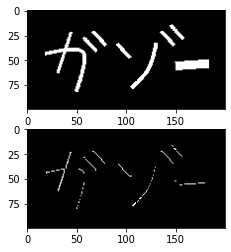

In [7]:
img = cv2.imread('../gazo.png').astype(np.int)
plt.subplot(2,1,1)
plt.imshow(img)

out = thining(img)
plt.subplot(2,1,2)
plt.imshow(out, cmap='gray')

cv2.imwrite('out63.jpg', out)